In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under 
# the input directory

import os
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as 
# output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be 
# saved outside of the current session

kaggle/input/.DS_Store
kaggle/input/tabular-playground-series-sep-2021/test.csv
kaggle/input/tabular-playground-series-sep-2021/sample_solution.csv
kaggle/input/tabular-playground-series-sep-2021/train.csv


In [2]:
# Define funciones de preprocesamiento
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Define modelos de aprendizaje automatico a ocupar
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Definir importe de una red neuronal
# importar red neuronal en PyTorch

# Define metricas de clasificacion
from sklearn.metrics import accuracy_score, classification_report

# Importa funciones auxiliares
import funciones_auxiliares as fx

## Preprocesamiento de datos para ocuparlos en Machine Learning

In [3]:
# Lee archivos train, test y sample solution
train = pd.read_csv("kaggle/input/tabular-playground-series-sep-2021/train.csv")
test = pd.read_csv("kaggle/input/tabular-playground-series-sep-2021/test.csv")
sample_solution = pd.read_csv("kaggle/input/tabular-playground-series-sep-2021/sample_solution.csv")

In [4]:
# Separa en variables independientes y dependientes
X = train.drop(columns=["id", "claim"])
y = train["claim"]

In [5]:
GENERADOR = 42
# Separa en train y valid para entrenar los modelos
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=GENERADOR)

# Escala los datos de X_train
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

# Imputa valores faltantes
imputador = SimpleImputer()
X_train = imputador.fit_transform(X_train)
X_valid = imputador.transform(X_valid)

## Definicion de modelos de Machine Learning - Clasificacion

In [6]:
# Define los modelos a entrenar en tanda
modelos = [
    {
        "nombre": "Regresion Logistica",
        "modelo": LogisticRegression(),
        "param_grid": {
            "penalty": ["l1", "l2"],
            "C": [0.01, 0.1, 1.0, 10.0],
            "max_iter": [100, 200, 300],
        },
    },
    # {
    #     "nombre": "K-Means",
    #     "modelo": KMeans(n_clusters=2),
    #     "param_grid": {
    #         "init": ["k-means++", "random"],
    #         "max_iter": [100, 300, 500],
    #     },
    # },
    # {
    #     "nombre": "Decision Tree",
    #     "modelo": DecisionTreeClassifier(),
    #     "param_grid": {
    #         "max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
    #         "max_leaf_nodes": [10, 50, 100],
    #         "criterion": ["gini", "entropy"],
    #         "min_samples_split": [0.05, 2],
    #     },
    # },
    # {
    #     "nombre": "Random Forest",
    #     "modelo": RandomForestClassifier(min_samples_split=2),
    #     "param_grid": {
    #         "max_depth": [5, 6, 7, 8, 9, 10],
    #         "n_estimators": [500, 600, 700, 800, 900, 1000],
    #         "max_leaf_nodes": [10, 50, 100],
    #     },
    # },
    # {
    #     "nombre": "Gradient Boosting",
    #     "modelo": GradientBoostingClassifier(min_samples_split=2),
    #     "param_grid": {
    #         "max_depth": [5, 6, 7, 8, 9, 10],
    #         "learning_rate": [0.001, 0.01, 0.1, 1],
    #         "max_leaf_nodes": [10, 50, 100],
    #     },
    # },
    # {
    #     "nombre": "SVM",
    #     "modelo": SVC(),
    #     "param_grid": {"C": [0.1, 1, 10, 100], "degree": [2, 3, 4]},
    # },
]

Training Regresion Logistica ...


/opt/anaconda3/envs/kaggle/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/kaggle/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/kaggle/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/kaggle/lib/python3.12/site-packages/sklearn/linear_

--------------Resultados Conjunto de Entrenamiento-----------------
Los resultados en la busqueda de hiperparametros son:


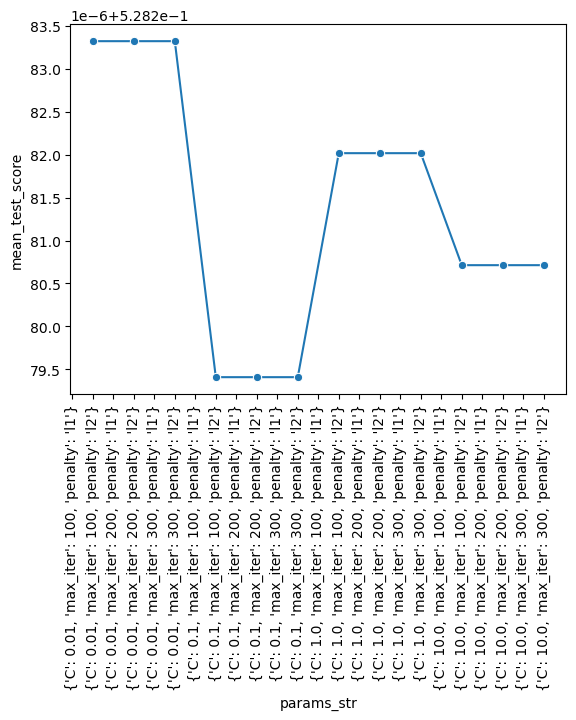

Los mejores parametros fueron: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2'}
El mejor desempeno fue: 0.5282833225678065


--------------Resultados Conjunto de Validacion-----------------
Los resultados en el conjunto de validacion son:
              precision    recall  f1-score   support

           0       0.53      0.54      0.54     96153
           1       0.53      0.51      0.52     95431

    accuracy                           0.53    191584
   macro avg       0.53      0.53      0.53    191584
weighted avg       0.53      0.53      0.53    191584

---------------------------------------------------------------------


In [7]:
# Entrena los modelos en tanda
resultados_modelos = fx.entrenar_ensamble_de_modelos_gridcv(
    modelos, X_train, X_valid, y_train, y_valid
)

Al entrenar los modelos, se puede ver lo siguiente:

1. El tiempo de entrenamiento es bastante extenso, incluso con modelos simples como la regresion logistica
2. El desempeño es bastante deficiente con el modelo de regresión logística. Esto significa que es necesario hacer un preprocesamiento más pensado.

## Feature Engineering

### Reduccion de Dimensionalidad

Los datos tienen muchas variables, por lo tanto una reduccion de dimensionalidad seria bastante bueno.

In [8]:
correlaciones = train.corr()

In [9]:
def obtener_correlaciones_apiladas(correlaciones):
    # Filtra el triangulo superior de la matriz de correlacion
    bool_triangulo_superior = np.triu(np.ones_like(correlaciones, dtype=bool))
    correlaciones_filtradas = correlaciones.mask(bool_triangulo_superior)

    # Convierte las correlaciones a formato long y filtra las que no tengan valores
    correlaciones_apiladas = correlaciones_filtradas.unstack().dropna()
    
    return correlaciones_apiladas

def identificar_correlaciones_mayores(correlaciones_apiladas, limite=0.8):
    # Filtrar las auto-correlaciones y los pares por debajo del umbral
    pares_alta_corr = correlaciones_apiladas[(abs(correlaciones_apiladas) > limite)]

    # Convertir la serie a una lista de tuplas
    lista_pares_alta_corr = [(index[0], index[1], corr) for index, corr in pares_alta_corr.items()]

    return lista_pares_alta_corr

In [10]:
correlaciones_apiladas = obtener_correlaciones_apiladas(correlaciones)
altas_correlaciones = identificar_correlaciones_mayores(correlaciones_apiladas, 0.05)

In [12]:
correlaciones_apiladas.describe()

count    7140.000000
mean        0.000075
std         0.003826
min        -0.057305
25%        -0.001852
50%         0.000102
75%         0.002068
max         0.026338
dtype: float64

De las correlaciones apiladas, se puede observar que el promedio de correlacion es de 0.000075, teniendo un coeficiente R2 minimo de -0.057 y un maximo de 0.026. Esto estaría indicando que ninguna variable tiene una alta correlación entre sí, siendo innecesario realizar un PCA.